In [1]:
import glob

In [2]:
import numpy as np

In [3]:
label_paths = np.sort(glob.glob('../Cancer16_AE/lesion_labels/*png'))

In [4]:
label_paths

array(['../Cancer16_AE/lesion_labels/tumor_001_0_122880.png',
       '../Cancer16_AE/lesion_labels/tumor_001_0_131072.png',
       '../Cancer16_AE/lesion_labels/tumor_001_16384_114688.png', ...,
       '../Cancer16_AE/lesion_labels/tumor_111_73728_98304.png',
       '../Cancer16_AE/lesion_labels/tumor_111_8192_131072.png',
       '../Cancer16_AE/lesion_labels/tumor_111_8192_139264.png'],
      dtype='<U55')

In [5]:
from PIL import Image

In [6]:
tumor_areas = np.array([np.sum(np.array(Image.open(fn))) for fn in label_paths]).astype(np.float32)/255

In [7]:
import pylab as pl

In [8]:
tumor_areas.shape, np.max(tumor_areas), np.min(tumor_areas)

((11623,), 16384.0, 0.0)

(array([240., 154., 116.,  98.,  67.,  71.,  45.,  47.,  43.,  43.,  42.,
         42.,  33.,  28.,  47.]),
 array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000, 16000]),
 <a list of 15 Patch objects>)

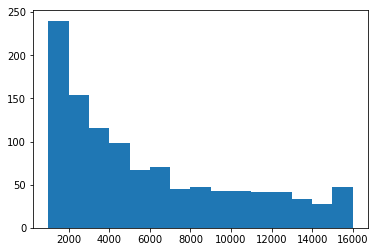

In [9]:
pl.hist(tumor_areas, bins=np.arange(1000, 128*128, 1000))

In [10]:
tumor_threshold = 0.1

In [11]:
# number of tiles with at least tumor_threshold*100 precent tumor in the tile
np.sum(tumor_areas>128*128*tumor_threshold)

1034

In [12]:
positive_enough_examples = []
for i,a in enumerate(np.array(tumor_areas>128*128*tumor_threshold).astype(np.float32)):
    if a==1:
#         im = np.array(Image.open(label_paths[i]))/255
        positive_enough_examples.append(label_paths[i])
print(len(positive_enough_examples))

1034


In [13]:
!pwd

/home/cstrauss2/CycleGAN-Tensorflow-2


In [14]:
import os

In [15]:
root_data_folder = 'datasets/camelyon16normal2tumor/'

In [49]:
if os.path.isdir(root_data_folder):
    !rm -r $root_data_folder

In [50]:
!mkdir -p $root_data_folder

In [16]:
folder_A = os.path.join(root_data_folder, 'trainA')
folder_B = os.path.join(root_data_folder, 'trainB')
folder_A_test = os.path.join(root_data_folder, 'testA')
folder_B_test = os.path.join(root_data_folder, 'testB')

In [52]:
!mkdir -p $folder_A $folder_A_test $folder_B $folder_B_test

In [18]:
!ls $root_data_folder

testA  testB  trainA  trainB


In [54]:
for fn in positive_enough_examples:
    tile_fn = os.path.join('/home/cstrauss2/Cancer16_AE/train16_L3/tumor',os.path.split(fn)[-1])
    symlink_fn = os.path.join(folder_A, os.path.split(fn)[-1])
    !ln -s $tile_fn $symlink_fn
    symlink_fn_test = os.path.join(folder_A_test, os.path.split(fn)[-1])
    !ln -s $tile_fn $symlink_fn_test

In [19]:
for tile_fn in np.sort(glob.glob('/home/cstrauss2/Cancer16_AE/train16_L3/normal/*png')):
    if np.random.uniform()>0.80:
        symlink_fn_test = os.path.join(folder_B_test, os.path.split(tile_fn)[-1])
        !ln -s $tile_fn $symlink_fn_test
    else:
        symlink_fn = os.path.join(folder_B, os.path.split(tile_fn)[-1])
        !ln -s $tile_fn $symlink_fn